In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
folder_path = 'clk_2309'
folder_contents = os.listdir(folder_path)
folder_contents

['COD0OPSRAP_20240980000_01D_30S_CLK.CLK',
 'COD0OPSRAP_20240990000_01D_30S_CLK.CLK',
 'COD0OPSRAP_20241000000_01D_30S_CLK.CLK',
 'COD0OPSRAP_20241010000_01D_30S_CLK.CLK',
 'COD0OPSRAP_20241020000_01D_30S_CLK.CLK',
 'COD0OPSRAP_20241030000_01D_30S_CLK.CLK',
 'COD0OPSRAP_20241040000_01D_30S_CLK.CLK',
 'EMR0OPSRAP_20240980000_01D_05M_CLK.CLK',
 'EMR0OPSRAP_20240990000_01D_05M_CLK.CLK',
 'EMR0OPSRAP_20241000000_01D_05M_CLK.CLK',
 'EMR0OPSRAP_20241010000_01D_05M_CLK.CLK',
 'EMR0OPSRAP_20241020000_01D_05M_CLK.CLK',
 'EMR0OPSRAP_20241030000_01D_05M_CLK.CLK',
 'EMR0OPSRAP_20241040000_01D_05M_CLK.CLK',
 'ESA0OPSRAP_20240980000_01D_05M_CLK.CLK',
 'ESA0OPSRAP_20240990000_01D_05M_CLK.CLK',
 'ESA0OPSRAP_20241000000_01D_05M_CLK.CLK',
 'ESA0OPSRAP_20241010000_01D_05M_CLK.CLK',
 'ESA0OPSRAP_20241020000_01D_05M_CLK.CLK',
 'ESA0OPSRAP_20241030000_01D_05M_CLK.CLK',
 'ESA0OPSRAP_20241040000_01D_05M_CLK.CLK',
 'GFZ0MGXRAP_20240980000_01D_30S_CLK.CLK',
 'GFZ0MGXRAP_20240990000_01D_30S_CLK.CLK',
 'GFZ0MGXRA

In [4]:
# Preallocate memory
clock_correction = []

In [5]:
for filename in folder_contents:
    file_path = os.path.join(folder_path, filename)
    line_ct = 0
    end_header = False
    try:
        with open(file_path, 'r') as file:
            for line in file:
                line_ct += 1
                if end_header:
                    if line.startswith("AS"):
                        columns = line.split()
                        if len(columns) >= 9:
                            clock_corr_str = float(columns[9])
                            clock_correction.append(clock_corr_str)
                elif "END OF HEADER" in line:
                    end_header = True

    except FileNotFoundError:
        print(f"File '{file_path}' not found.")
    except Exception as e:
        print(f"An error occurred while processing file '{file_path}': {str(e)}")

An error occurred while processing file 'clk_2309\IAC0MGXFIN_20240980000_01D_30S_CLK.CLK': could not convert string to float: '0.327332411805D-03'
An error occurred while processing file 'clk_2309\IAC0MGXFIN_20240990000_01D_30S_CLK.CLK': could not convert string to float: '0.329745746787D-03'
An error occurred while processing file 'clk_2309\IAC0MGXFIN_20241000000_01D_30S_CLK.CLK': could not convert string to float: '0.332157584523D-03'
An error occurred while processing file 'clk_2309\IAC0MGXFIN_20241010000_01D_30S_CLK.CLK': could not convert string to float: '0.334577686681D-03'
An error occurred while processing file 'clk_2309\IAC0MGXFIN_20241020000_01D_30S_CLK.CLK': could not convert string to float: '0.337000778828D-03'


In [6]:
line_ct = 0
end_header = False

if len(folder_contents) > 0:
    first_file_path = os.path.join(folder_path, folder_contents[0])  # Get path of the first file

    try:
        with open(first_file_path, 'r') as file:
                    for line in file:
                        line_ct += 1
                        if end_header:
                            if line.startswith("AS"):
                                columns = line.split()
                                if len(columns) >= 9:
                                    clock_corr_str = float(columns[9])
                                    clock_correction.append(clock_corr_str)
                        elif "END OF HEADER" in line:
                            end_header = True

    except FileNotFoundError:
        print(f"File '{first_file_path}' not found.")
    except Exception as e:
        print(f"An error occurred while processing file '{first_file_path}': {str(e)}")

else:
    print(f"No files found in folder '{folder_path}'.")

In [7]:
print(clock_correction[:1000])

[0.000117394512593, -0.000105464192397, -0.000367541389314, 0.00473617673376, -0.000113128638313, -0.000250954177102, -0.000397921111993, -0.000615162915943, 0.0030765701478, -0.000982653537939, -2.08851748054e-05, -7.27969011034e-07, -9.56033694683e-05, 0.000521882872548, -0.000290846741923, -0.000587909808851, -0.000693313032149, 3.04229114803e-06, 0.000418432678845, -0.000317916752543, -0.000172507111603, -2.0169612581e-05, 1.00726356831e-05, -0.0001042305004, -0.000209802779818, 0.000178341712456, -0.00045770098739, 0.000296249154933, 0.000332846982137, -0.000168195214164, 0.000333864454959, -0.000101566680099, 0.000105986778213, 0.000151267508466, -6.10646660658e-06, -0.000629192604946, -0.000494232232422, 0.000640604387922, 0.000369860362138, 0.000145699634218, -0.000323023078773, 0.000711200864104, -0.000589886952519, 0.000464612596201, 0.00038112706599, 0.000128286073769, 4.35479044636e-06, 0.000194821466846, -0.000456274047979, 0.000493176892558, 0.000170048163004, -1.70243424

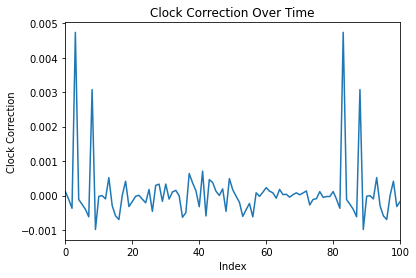

In [8]:
plt.plot(clock_correction)
plt.xlabel('Index')
plt.ylabel('Clock Correction')
plt.title('Clock Correction Over Time')
plt.xlim(0, 100) 
plt.show()

In [9]:
# Save clock_correction array into an npz file
indices = np.arange(len(clock_correction))
np.savez('correction_data.npz', indices=indices, y=clock_correction)

In [10]:
# Load the npz file
data = np.load('correction_data.npz')

In [11]:
# Extract indices and 'y' (clock_correction) array from the loaded data
indices = data['indices']
clock_correction = data['y']

In [12]:
len(clock_correction)

14948765

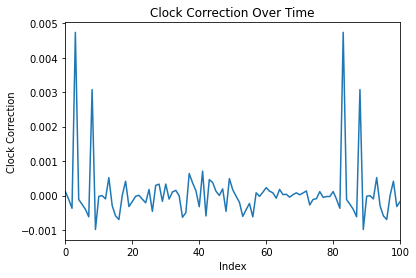

In [13]:
# Plotting with custom indices as x-axis
plt.plot(indices, clock_correction)
plt.xlabel('Index')
plt.ylabel('Clock Correction')
plt.title('Clock Correction Over Time')
plt.xlim(0, 100)  # Adjust the x-axis limit as needed
plt.show()